In [1]:
import pickle
with open("precomputed_simulations.pickle",'rb') as f:
    d = pickle.load(f)
    results = d['results']
    list_of_calibrations = d['calibrations']
import numpy


In [2]:
mkdir -p graphs

## Global graphs configuration

In [3]:
469.75502/72.27

6.500000276740003

In [4]:
output_dir = 'graphs/'

delta_gamma = 2.0
min_gamma = -delta_gamma*0.1
max_gamma = delta_gamma*1.1
min_xr = -0.66666*0.1
max_xr = 0.66666*1.1
deltaf = 0.1
min_f = 0 - deltaf*0.1
max_f = deltaf*(1.1)
min_r = -0.05
max_r = 1.05

T = 25

width = 6.5 # textwidth in inches

from matplotlib import pyplot as plt
get_ipython().magic('matplotlib inline')
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6}
linestyles = ['solid','dashed','dotted','dashdot']
nointstyle = ':'
# matplotlib.rc('font', **font)
leg_fontsize = 6
ebarsize = 6
titlesize = 8

ticksize = 6 # for ticks
labelsize= 6
# plt.rcParams.update({'figure.titlesize': 'large'})



## small initial reserves (figure 2)

/home/pablo/.local/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


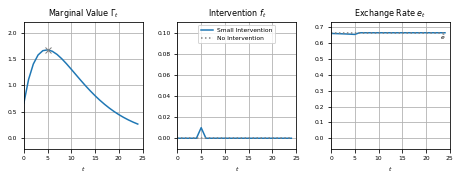

In [5]:
sol = results[('baseline','optimal',0.01)]
sol
i_peak = numpy.argmax(sol['Gamma'])

fig = plt.figure(figsize=(width,0.4*width))

sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
plt.plot(sol['Gamma'])
plt.xlim(0,T)
# plt.vlines(i_peak, min_gamma, max_gamma,color='grey', linestyle=':')

plt.plot(i_peak, sol['Gamma'].iloc[i_peak],'x', color='grey')
yl = plt.ylim()
plt.ylim(min_gamma, max_gamma)
#plt.text( i_peak+0.5, 0.03, '$t^{\star}$', fontsize=ebarsize)
plt.xlim(0,T)
plt.grid()
plt.xlabel('$t$', fontsize=labelsize)
plt.title("Marginal Value $\Gamma_t$", fontsize=titlesize)

sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
plt.plot(sol['f'], label="Small Intervention")
plt.plot(sol['f']*0, label="No Intervention", linestyle=nointstyle, color='grey')
plt.legend(loc='upper center',fontsize=leg_fontsize)
plt.xlim(0,T)
plt.ylim(min_f, max_f)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Intervention $f_t$", fontsize=titlesize)

sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)

plt.plot(sol['e'])
plt.plot(sol['e']*0+sol['e'].iloc[-1], linestyle=nointstyle, color='grey')
plt.text(23,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

yl = plt.ylim()
plt.xlim(0,T)
plt.ylim(min_xr, max_xr)         
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e_t$", fontsize=titlesize)

plt.tight_layout()
# fig.savefig('graphs/small_initial_reserves.pdf')
fig.savefig(output_dir + 'figure_2.pdf')

## Figure 3

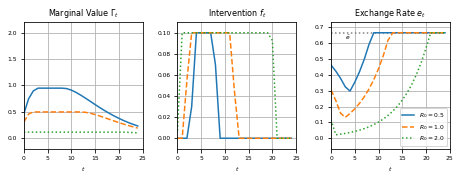

In [6]:

# sensitivity on R-0

cases = [
('baseline', 'optimal', 0.5),
('baseline', 'optimal', 1.0),
('baseline', 'optimal', 2.0)]

sols = [results[c] for c in cases]

fig = plt.figure(figsize=(width, 0.4*width))

sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
# sf.titlesize = 8
sf.title.fontsize = 6
for i in range(3):
    plt.plot(sols[i]['Gamma'][:T], label='$R_0={}$'.format(cases[i][2]), linestyle=linestyles[i])
yl = plt.ylim()
plt.xlim(0,T)
plt.ylim(min_gamma, max_gamma)
plt.grid()
# plt.legend(loc='upper right', fontsize=4)
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Marginal Value $\Gamma_t$", fontsize=titlesize)

sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
for i in range(3):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim(min_f, max_f)
plt.xlim(0,T)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Intervention $f_t$", fontsize=titlesize)

sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
vv = sols[i]['e'].iloc[-1]
plt.plot(sols[i]['e'][:T]*0+vv, color='grey', label='_'.format(cases[i][2]), linestyle=':')
for i in range(3):
    plt.plot(sols[i]['e'][:T], label='$R_0={}$'.format(cases[i][2]), linestyle=linestyles[i])
plt.text(3,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)
plt.xlim(0,T)
yl = plt.ylim(min_xr, max_xr)

plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.legend(loc='lower right', fontsize=leg_fontsize)

plt.title("Exchange Rate $e_t$", fontsize=titlesize)

plt.tight_layout()

fig.savefig(output_dir + 'figure_3.pdf')


## Figure 4

In [7]:
import pickle
with open("precomputed_decision_rules.pickle",'rb') as f:
    decision_rules_saved= pickle.load(f)
decision_rules = decision_rules_saved['decision_rules']


In [8]:
from calibrations import calib
zbar = calib['zbar']
c = calib['c']

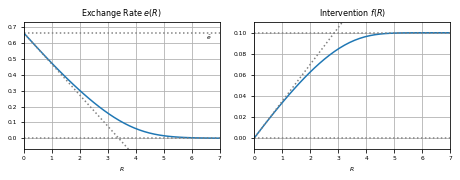

In [9]:
fig = plt.figure(figsize=(width,0.4*width))
sol = decision_rules[1.0]

sf = plt.subplot(121)
sf.tick_params(labelsize=ticksize)
plt.plot(sol[0], sol[1][0])
plt.plot(sol[0], sol[1][0][0]+0*sol[1][0], color='grey', linestyle=nointstyle)
slope = (sol[1][0][1]-sol[1][0][0])/(sol[0][1]-sol[0][0])
plt.plot(sol[0], sol[1][0]*0, linestyle=':', color='grey')
plt.plot(sol[0],  sol[1][0][0] + slope*sol[0], linestyle=':', color='grey')
plt.grid()
plt.text(6.5,0.62,"$\\bar{e}$",fontsize=leg_fontsize)
plt.title("Exchange Rate $e(R)$", fontsize=titlesize)
plt.xlim(0,7)
plt.ylim(min_xr, max_xr)
plt.xlabel('$R$',fontsize=labelsize)


sf = plt.subplot(122)
sf.tick_params(labelsize=ticksize)
slope = (sol[1][1][1]-sol[1][1][0])/(sol[0][1]-sol[0][0])

plt.plot(sol[0], sol[1][1])
plt.plot(sol[0], sol[1][1][0] + sol[0]*slope, linestyle=':', color='grey')

plt.plot(sol[0], sol[1][0]*0, linestyle=':', color='grey')
plt.plot(sol[0], sol[1][0]*0+sol[1][1][-1], linestyle=':', color='grey')
plt.grid()
plt.title("Intervention $f(R)$", fontsize=titlesize)
plt.xlabel('$R$',fontsize=labelsize)
plt.ylim(min_f, max_f)
plt.xlim(0,7)
plt.tight_layout()

fig.savefig(output_dir + 'figure_4.pdf', bbox_inches='tight')




## Figure 5: time consistent : sensitivity to R1


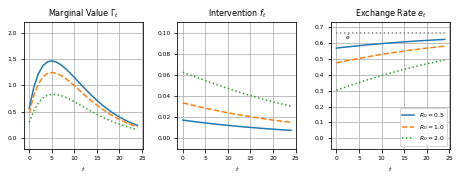

In [10]:
fig = plt.figure(figsize=(width,0.4*width))

sols = [
    results[('baseline','time-consistent', 0.5)],
    results[('baseline','time-consistent', 1.0)],
    results[('baseline','time-consistent', 2.0)]
]
labels = [
    "$R_0=0.5$",
    "$R_0=1.0$",
    "$R_0=2.0$",
]

sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
for i,sol in enumerate(sols):
    plt.plot(sol['Gamma'], linestyle=linestyles[i])
yl = plt.ylim()
plt.ylim(min_gamma, max_gamma)
plt.grid()
plt.xlabel('$t$', fontsize=labelsize)
plt.title("Marginal Value $\Gamma_t$", fontsize=titlesize)

sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
for i,sol in enumerate(sols):
    plt.plot(sol['f'], linestyle=linestyles[i])
plt.ylim(min_f, max_f)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Intervention $f_t$", fontsize=titlesize)

sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
for i,sol in enumerate(sols):
    plt.plot(sol['e'], linestyle=linestyles[i], label= labels[i])
plt.plot(sols[i]['e'][:T]*0+vv, color='grey', label='_'.format(cases[i][2]), linestyle=':')
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)
plt.text(2,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

yl = plt.ylim(min_xr, max_xr)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e_t$", fontsize=titlesize)
plt.legend(loc='lower right', fontsize=leg_fontsize)
plt.tight_layout()
fig.savefig(output_dir + 'figure_5.pdf')

## comparison

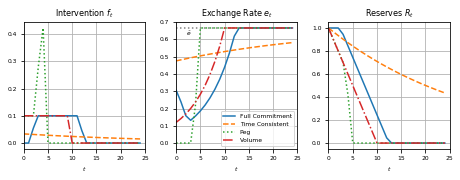

In [11]:
sols = [
    results[("baseline",'optimal',1.0)],
    results[("baseline",'time-consistent',1.0)],
    results[("baseline",'peg',1.0)],
    results[("baseline",'volume',1.0)]
]

# betas = [list_of_calibrations[c]['beta'] for c in cases]
labels = [
    'Full Commitment',
    'Time Consistent',
    'Peg',
    'Volume'
]

fig = plt.figure(figsize=(width,0.4*width))
#


sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.grid()
plt.title("Intervention $f_t$", fontsize=titlesize)

sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[0]['e'][:T]*0+vv, color='grey', label='_', linestyle=':')
for i in range(len(sols)):
    plt.plot(sols[i]['e'][:T], label=labels[i], linestyle=linestyles[i])
plt.xlim(0,T)
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)

plt.legend(loc='lower right', fontsize=leg_fontsize)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e_t$", fontsize=titlesize)
plt.text(2,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['R'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.ylim(min_r, max_r)

plt.title("Reserves $R_t$", fontsize=titlesize)


plt.tight_layout()
fig.savefig(output_dir + 'figure_6.pdf', bbox_inches='tight')

# figure 7

In [12]:
import pandas
df = pandas.read_excel('simple_rules_welfares.xlsx')

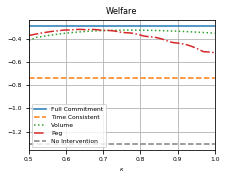

In [13]:
kvec = df.index
plt.figure(figsize=(width*0.5,0.4*width))
sf = plt.subplot(111)
sf.tick_params(labelsize=ticksize)
plt.plot(kvec, df['commitment'], label='Full Commitment', linestyle=linestyles[0])
plt.plot(kvec, df['time-consistent'], label='Time Consistent', linestyle=linestyles[1])
plt.plot(kvec, df['volume'], label='Volume', linestyle=linestyles[2])
plt.plot(kvec, df['peg'], label='Peg', linestyle=linestyles[3])
plt.plot(kvec, df['do_nothing'], label='No Intervention', color='grey', linestyle='--')
plt.grid()
plt.xlim(0.5, 1.0)
plt.legend(fontsize=leg_fontsize)
plt.xlabel("$\kappa$",fontsize=labelsize)
plt.title("Welfare", fontsize=titlesize)
plt.tight_layout()
plt.savefig(output_dir + 'figure_7.pdf')

# figure 8

/home/pablo/.local/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


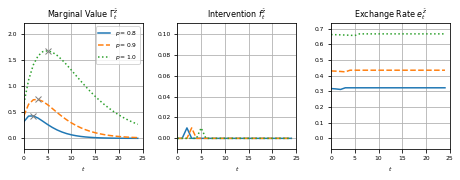

In [14]:
sol = results[('baseline','optimal',0.01)]
sol_8 = results[('p_8','optimal',0.01)]
sol_9 = results[('p_9','optimal',0.01)]
sol
i_peak = numpy.argmax(sol['Gamma'])

fig = plt.figure(figsize=(width,0.4*width))

sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
plt.plot(sol_8['Gamma'], label='$p=0.8$', linestyle=linestyles[0])
i_peak = numpy.argmax(sol_8['Gamma'])
plt.plot(i_peak, sol_8['Gamma'].iloc[i_peak],'x', color='grey')
plt.plot(sol_9['Gamma'], label='$p=0.9$', linestyle=linestyles[1])
i_peak = numpy.argmax(sol_9['Gamma'])
plt.plot(i_peak, sol_9['Gamma'].iloc[i_peak],'x', color='grey')
plt.plot(sol['Gamma'], label='$p=1.0$', linestyle=linestyles[2])
i_peak = numpy.argmax(sol['Gamma'])
plt.plot(i_peak, sol['Gamma'].iloc[i_peak],'x', color='grey')
# plt.vlines(i_peak, min_gamma, max_gamma,color='grey', linestyle='--')
yl = plt.ylim()
plt.ylim(min_gamma, max_gamma)
plt.xlim(0,T)

# plt.text( i_peak+0.5, 0.03, '$t^{\star}$', fontsize=ebarsize)
plt.grid()
plt.xlabel('$t$', fontsize=labelsize)
plt.legend(loc='upper right',fontsize=leg_fontsize)

plt.title("Marginal Value $\Gamma^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
# plt.plot(sol['f']*0, label="No Intervention")
# plt.plot(sol['f'], label="Small Intervention")
plt.plot(sol_8['f'], linestyle=linestyles[0])
plt.plot(sol_9['f'], linestyle=linestyles[1])
plt.plot(sol['f'], linestyle=linestyles[2])

plt.xlim(0,T)

plt.ylim(min_f, max_f)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Intervention $f^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
# plt.plot(sol['e']*0+sol['e'].iloc[-1], color='grey', linestyle=nointstyle)

plt.plot(sol_8['e'], linestyle=linestyles[0])
plt.plot(sol_9['e'], linestyle=linestyles[1])
plt.plot(sol['e'], linestyle=linestyles[2])

yl = plt.ylim(min_xr, max_xr)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e^{\\bar{z}}_t$", fontsize=titlesize)
plt.xlim(0,T)
plt.tight_layout()
# fig.savefig('graphs/small_initial_reserves.pdf')
fig.savefig(output_dir + 'figure_8.pdf')

# Figure 9

/home/pablo/.local/opt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


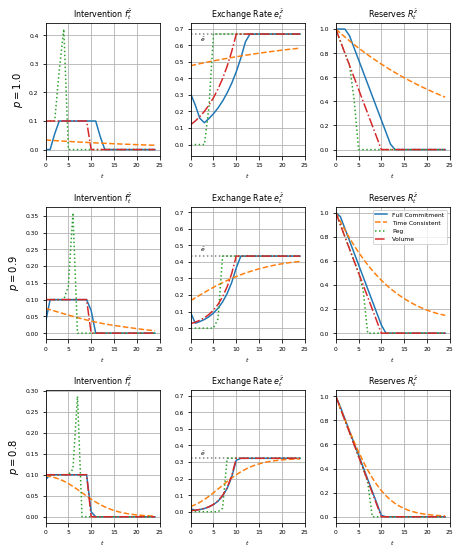

In [15]:
fig = plt.figure(figsize=(width,0.4*width*3))



# betas = [list_of_calibrations[c]['beta'] for c in cases]
labels = [
    'Full Commitment',
    'Time Consistent',
    'Peg',
    'Volume'
]

#

sols = [
    results[("baseline",'optimal',1.0)],
    results[("baseline",'time-consistent',1.0)],
    results[("baseline",'peg',1.0)],
    results[("baseline",'volume',1.0)]
]

vv = sols[0]['e'].iloc[-1]

sf = plt.subplot(331)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.grid()
plt.ylabel('$p=1.0$')

plt.title("Intervention $f^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(332)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[0]['e'][:T]*0+vv, color='grey', label='_', linestyle=nointstyle)
for i in range(len(sols)):
    plt.plot(sols[i]['e'][:T], label=labels[i], linestyle=linestyles[i])
plt.xlim(0,T)
plt.text(2,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)

#plt.legend(loc='lower right', fontsize=leg_fontsize)
plt.grid()
plt.ylim(min_xr, max_xr)

plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(333)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    sols[i]['R'].iloc[0] = 1.0

    plt.plot(sols[i]['R'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.title("Reserves $R^{\\bar{z}}_t$", fontsize=titlesize)
plt.ylim(min_r, max_r)

plt.tight_layout()


####
#### p = 0.9
####

sols = [
    results[("p_9",'optimal',1.0)],
    results[("p_9",'time-consistent',1.0)],
    results[("p_9",'peg',1.0)],
    results[("p_9",'volume',1.0)]
]

vv = sols[0]['e'].iloc[-1]

sf = plt.subplot(334)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.grid()
plt.ylabel('$p=0.9$')
plt.title("Intervention $f^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(335)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[0]['e'][:T]*0+vv, color='grey', label='_', linestyle=nointstyle)
for i in range(len(sols)):
    plt.plot(sols[i]['e'][:T], label=labels[i], linestyle=linestyles[i])
plt.xlim(0,T)
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)
plt.text(2,0.46,"$\\bar{e}$",fontsize=leg_fontsize)

plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e^{\\bar{z}}_t$", fontsize=titlesize)
plt.ylim(min_xr, max_xr)


sf = plt.subplot(336)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    sols[i]['R'].iloc[0] = 1.0

    plt.plot(sols[i]['R'][:T], linestyle=linestyles[i], label=labels[i])
yl = plt.ylim()
plt.legend(loc='upper right', fontsize=leg_fontsize)

plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.ylim(min_r, max_r)

plt.title("Reserves $R^{\\bar{z}}_t$", fontsize=titlesize)

plt.tight_layout()

####
#### p = 0.8
####


sols = [
    results[("p_8",'optimal',1.0)],
    results[("p_8",'time-consistent',1.0)],
    results[("p_8",'peg',1.0)],
    results[("p_8",'volume',1.0)]
]

vv = sols[0]['e'].iloc[-1]

sf = plt.subplot(337)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlabel('$t$',fontsize=labelsize)
plt.ylabel('$p=0.8$')
plt.xlim(0,T)
plt.grid()
plt.title("Intervention $f^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(338)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[0]['e'][:T]*0+vv, color='grey', label='_', linestyle=nointstyle)
for i in range(len(sols)):

    plt.plot(sols[i]['e'][:T], label=labels[i], linestyle=linestyles[i])
plt.xlim(0,T)
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)
plt.ylim(min_xr, max_xr)
plt.text(2,0.34,"$\\bar{e}$",fontsize=leg_fontsize)

#plt.legend(loc='lower right', fontsize=leg_fontsize)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(339)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    sols[i]['R'].iloc[0] = 1.0
    plt.plot(sols[i]['R'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.ylim(min_r, max_r)

plt.title("Reserves $R^{\\bar{z}}_t$", fontsize=titlesize)

plt.tight_layout()

fig.savefig(output_dir + 'figure_9.pdf', bbox_inches='tight')

# Figure 10

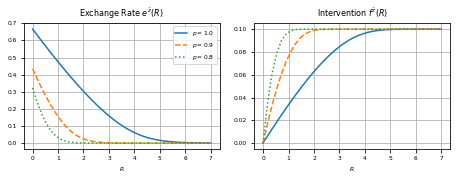

In [16]:
import pickle
with open("precomputed_decision_rules.pickle",'rb') as f:
    decision_rules_saved= pickle.load(f)
decision_rules = decision_rules_saved['decision_rules']


fig = plt.figure(figsize=(width,0.4*width))
sf = plt.subplot(121)
sf.tick_params(labelsize=ticksize)
for i,p in enumerate([1.0,0.9,0.8]):
    sol = decision_rules[p]
    plt.plot(sol[0], sol[1][0], label='$p={}$'.format(p), linestyle=linestyles[i])
plt.legend(loc='upper right', fontsize=leg_fontsize)
sf.tick_params(labelsize=ticksize)
plt.grid()
plt.title("Exchange Rate $e^{\\bar{z}}(R)$", fontsize=titlesize)
plt.xlabel('$R$',fontsize=labelsize)
sf = plt.subplot(122)
sf.tick_params(labelsize=ticksize)
for i,p in enumerate([1.0,0.9,0.8]):
    sol = decision_rules[p]
    plt.plot(sol[0], sol[1][1], label='$p={}$'.format(p), linestyle=linestyles[i])
plt.title("Intervention $f^{\\bar{z}}(R)$", fontsize=titlesize)
plt.xlabel('$R$',fontsize=labelsize)

plt.grid()
plt.tight_layout()
fig.savefig(output_dir + 'figure_10.pdf', bbox_inches='tight')

# Figure 11

In [17]:
import pandas


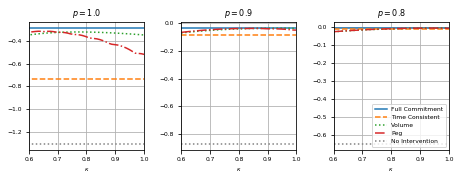

In [18]:
plt.figure(figsize=(width,0.4*width))

df = pandas.read_excel('simple_rules_welfares.xlsx')
kvec = df.index
sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
plt.plot(kvec, df['commitment'], label='Full Commitment', linestyle=linestyles[0])
plt.plot(kvec, df['time-consistent'], label='Time Consistent', linestyle=linestyles[1])
plt.plot(kvec, df['volume'], label='Volume', linestyle=linestyles[2])
plt.plot(kvec, df['peg'], label='Peg', linestyle=linestyles[3])
plt.plot(kvec, df['do_nothing'], label='No Intervention', color='grey', linestyle=nointstyle)
plt.grid()
plt.xlim(0.6, 1.0)
# plt.legend(fontsize=leg_fontsize)
plt.xlabel("$\kappa$",fontsize=labelsize)
plt.title("$p=1.0$", fontsize=titlesize)
plt.tight_layout()


df = pandas.read_excel('simple_rules_welfares_9.xlsx')
kvec = df.index
sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
plt.plot(kvec, df['commitment'], label='Full Commitment', linestyle=linestyles[0])
plt.plot(kvec, df['time-consistent'], label='Time Consistent', linestyle=linestyles[1])
plt.plot(kvec, df['volume'], label='Volume', linestyle=linestyles[2])
plt.plot(kvec, df['peg'], label='Peg', linestyle=linestyles[3])
plt.plot(kvec, df['do_nothing'], label='No Intervention', color='grey', linestyle=nointstyle)
plt.grid()
plt.xlim(0.6, 1.0)
plt.xlabel("$\kappa$",fontsize=labelsize)
plt.title("$p=0.9$", fontsize=titlesize)
plt.tight_layout()


df = pandas.read_excel('simple_rules_welfares_8.xlsx')
kvec = df.index
sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
plt.plot(kvec, df['commitment'], label='Full Commitment', linestyle=linestyles[0])
plt.plot(kvec, df['time-consistent'], label='Time Consistent', linestyle=linestyles[1])
plt.plot(kvec, df['volume'], label='Volume', linestyle=linestyles[2])
plt.plot(kvec, df['peg'], label='Peg', linestyle=linestyles[3])
plt.plot(kvec, df['do_nothing'], label='No Intervention', color='grey', linestyle=nointstyle)
plt.grid()
plt.xlim(0.6, 1.0)
plt.legend(fontsize=leg_fontsize, loc='lower right')
plt.xlabel("$\kappa$",fontsize=labelsize)
plt.title("$p=0.8$", fontsize=titlesize)
plt.tight_layout()

plt.savefig(output_dir + 'figure_11.pdf')

# Moving target : A1

In [19]:
import pickle
with open("precomputed_moving_target.pickle",'rb') as f:
    od_saved = pickle.load(f)
od = od_saved['simulations']
lamvec = [0.8, 0.9,  1.0]

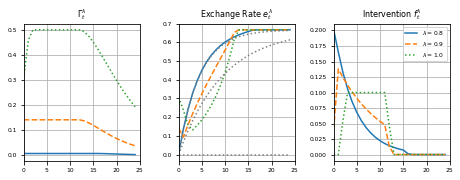

In [20]:
fig = plt.figure(figsize=(width,0.4*width))

sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
for i,lam in enumerate(lamvec):
    df = od[(1.0,lam)]
    plt.plot(df['Gamma'], linestyle=linestyles[i])
plt.grid()
plt.xlim(0,T)

plt.title("$\Gamma^{\lambda}_t$", fontsize=titlesize)
sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
for i,lam in enumerate(lamvec):
    df = od[(1.0,lam)]
    plt.plot(df['e'], linestyle=linestyles[i])
for lam in lamvec:
    df = od[(0.01,lam)]
    plt.plot(df['target'],linestyle=':', color='grey')
plt.grid()
plt.xlim(0,T)

# plt.xlim(0,15)
plt.title("Exchange Rate $e^{\lambda}_{t}$", fontsize=titlesize)
sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
for i,lam in enumerate(lamvec):
    df = od[(1.0,lam)]
    plt.plot(df['f'], label='$\lambda={}$'.format(lam), linestyle=linestyles[i])
plt.grid()
plt.xlim(0,T)
plt.legend(loc='upper right',fontsize=leg_fontsize)
plt.title("Intervention $f^{\lambda}_{t}$", fontsize=titlesize)
plt.xlim(0,25)
plt.tight_layout()

fig.savefig(output_dir + 'figure_A1_1.pdf', bbox_inches='tight')

/home/pablo/.local/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


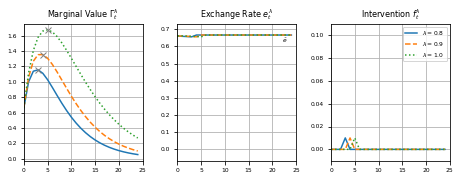

In [21]:
fig = plt.figure(figsize=(width,0.4*width))
sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)

for i,lam in enumerate(lamvec):
    df = od[(0.01,lam)]
    plt.plot(df['Gamma'], linestyle=linestyles[i])
for lam in lamvec:
    df = od[(0.01,lam)]
    i_peak = numpy.argmax(df['Gamma'])
    plt.plot(i_peak, df['Gamma'].iloc[i_peak],'x', color='grey')

plt.xlim(0,T)

plt.grid()
plt.title("Marginal Value $\Gamma^{\lambda}_t$", fontsize=titlesize)
sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
for i,lam in enumerate(lamvec):
    df = od[(0.01,lam)]
    plt.plot(df['e'], linestyle=linestyles[i])
# for lam in lamvec:
#     df = od[(0.01,lam)]
#     plt.plot(df['target'],linestyle=':', color='grey')
# plt.text(20,0.62,"$\\bar{e}$",fontsize=leg_fontsize)
plt.text(22,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

plt.grid()
plt.xlim(0,T)

plt.xlim(0,25)
plt.title("Exchange Rate $e^{\lambda}_{t}$", fontsize=titlesize)
plt.ylim(min_xr,max_xr)

sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
for i,lam in enumerate(lamvec):
    df = od[(0.01,lam)]
    plt.plot(df['f'], label='$\lambda={}$'.format(lam), linestyle=linestyles[i])
plt.grid()
plt.xlim(0,T)

plt.legend(loc='upper right',fontsize=leg_fontsize)
plt.title("Intervention $f^{\lambda}_{t}$", fontsize=titlesize)
plt.xlim(0,25)
plt.ylim(min_f,max_f)
plt.tight_layout()


fig.savefig(output_dir + 'figure_A1_2.pdf', bbox_inches='tight')

## sensitivity_on a, $\beta$

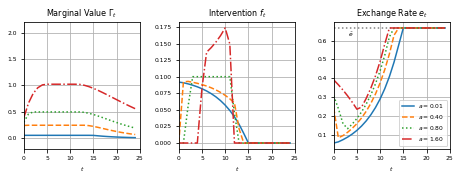

In [22]:
cases = [
('super_low_a', 'optimal', 1.0),
('low_a', 'optimal', 1.0),
('baseline', 'optimal', 1.0),
('high_a', 'optimal', 1.0)]

sols = [results[c] for c in cases]

betas = [list_of_calibrations[c]['a'] for c in cases]
vv = sols[0]['e'][T-1]

fig = plt.figure(figsize=(width, 0.4*width))

sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
for i in range(4):
    plt.plot(sols[i]['Gamma'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlim(0,T)
plt.ylim(min_gamma, max_gamma)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Marginal Value $\Gamma_t$", fontsize=titlesize)

sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
for i in range(4):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.title("Intervention $f_t$", fontsize=titlesize)

sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[3]['e'][:T]*0+vv, color='grey', label='_'.format(cases[i][2]), linestyle=':')
for i in range(4):
    plt.plot(sols[i]['e'][:T], label='$a={:.2f}$'.format(betas[i]), linestyle=linestyles[i])
plt.xlim(0,T)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.text(3,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)

plt.legend(loc='lower right', fontsize=leg_fontsize)

plt.title("Exchange Rate $e_t$", fontsize=titlesize)


plt.tight_layout()

plt.savefig("sensitivity_to_a.pdf")


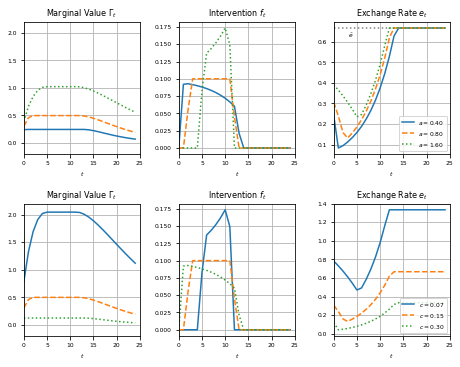

In [23]:
len(results.keys())

cases = [
# ('super_low_a', 'optimal', 1.0),
('low_a', 'optimal', 1.0),
('baseline', 'optimal', 1.0),
('high_a', 'optimal', 1.0)]

sols = [results[c] for c in cases]

betas = [list_of_calibrations[c]['a'] for c in cases]
vv = sols[0]['e'][T-1]

fig = plt.figure(figsize=(width, 0.4*width*2))

sf = plt.subplot(231)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['Gamma'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlim(0,T)
plt.ylim(min_gamma, max_gamma)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Marginal Value $\Gamma_t$", fontsize=titlesize)

sf = plt.subplot(232)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.title("Intervention $f_t$", fontsize=titlesize)

sf = plt.subplot(233)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[i]['e'][:T]*0+vv, color='grey', label='_'.format(cases[i][2]), linestyle=':')
for i in range(len(sols)):
    plt.plot(sols[i]['e'][:T], label='$a={:.2f}$'.format(betas[i]), linestyle=linestyles[i])
plt.xlim(0,T)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)
plt.text(3,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

plt.legend(loc='lower right', fontsize=leg_fontsize)

plt.title("Exchange Rate $e_t$", fontsize=titlesize)


plt.tight_layout()

### Second row

cases = [
('low_c', 'optimal', 1.0),
('baseline', 'optimal', 1.0),
('high_c', 'optimal', 1.0)]

sols = [results[c] for c in cases]

# betas = [list_of_calibrations[c]['beta'] for c in cases]
betas = [list_of_calibrations[c]['c'] for c in cases]

# fig = plt.figure(figsize=(width,0.4*width))

sf = plt.subplot(234)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['Gamma'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlim(0,T)
plt.ylim(min_gamma, max_gamma)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Marginal Value $\Gamma_t$", fontsize=titlesize)

sf = plt.subplot(235)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.title("Intervention $f_t$", fontsize=titlesize)

sf = plt.subplot(236)
sf.tick_params(labelsize=ticksize)
# plt.plot(sols[i]['e'][:T]*0+vv, color='grey', label='_'.format(cases[i][2]), linestyle=':')
for i in range(len(sols)):
    plt.plot(sols[i]['e'][:T], label='$c={:.2f}$'.format(betas[i]), linestyle=linestyles[i])
plt.xlim(0,T)
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)
# plt.text(3,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

plt.legend(loc='lower right', fontsize=leg_fontsize)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e_t$", fontsize=titlesize)

plt.tight_layout()


fig.savefig(output_dir + 'figure_A2.pdf')

## sensitivity to a

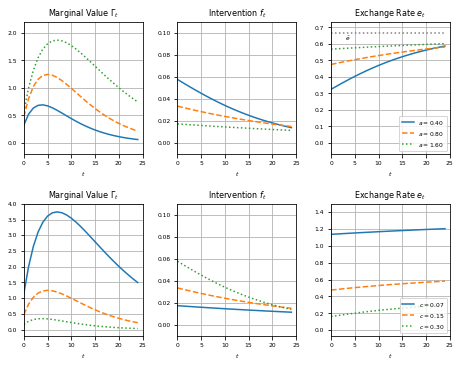

In [24]:
cases = [
#     ('super_low_a', 'time-consistent', 1.0),
    ('low_a', 'time-consistent', 1.0),
    ('baseline', 'time-consistent', 1.0),
    ('high_a', 'time-consistent', 1.0)
]

sols = [results[c] for c in cases]


betas = [list_of_calibrations[c]['a'] for c in cases]
c = cases[0]
vv = list_of_calibrations[c]['zbar']/list_of_calibrations[c]['c']

fig = plt.figure(figsize=(width,0.4*width*2))

sf = plt.subplot(231)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['Gamma'][:T], linestyle=linestyles[i])
yl = plt.ylim(min_gamma, max_gamma)
plt.xlim(0,T)
plt.ylim(yl[0],yl[1])
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Marginal Value $\Gamma_t$", fontsize=titlesize)

sf = plt.subplot(232)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.ylim(min_f, max_f)
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)

plt.grid()
plt.title("Intervention $f_t$", fontsize=titlesize)

sf = plt.subplot(233)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[i]['e'][:T]*0+vv, color='grey', label='_'.format(cases[i][2]), linestyle=':')
for i in range(len(sols)):
    plt.plot(sols[i]['e'][:T], label='$a={:.2f}$'.format(betas[i]), linestyle=linestyles[i])
plt.xlim(0,T)
plt.ylim(min_xr,max_xr)
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)
plt.text(3,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

plt.legend(loc='lower right', fontsize=leg_fontsize)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
# plt.ylim(min_xr, max_xr)
plt.title("Exchange Rate $e_t$", fontsize=titlesize)

plt.tight_layout()
# fig.savefig(output_dir + 'figure_8.pdf', bbox_inches='tight')

#######
#######

cases = [
('low_c', 'time-consistent', 1.0),
('baseline', 'time-consistent', 1.0),
('high_c', 'time-consistent', 1.0)]

sols = [results[c] for c in cases]

betas = [list_of_calibrations[c]['c'] for c in cases]
c = cases[0]
# vv = list_of_calibrations[c]['zbar']/list_of_calibrations[c]['c']

# fig = plt.figure(figsize=(width,0.4*width))

sf = plt.subplot(234)
sf.tick_params(labelsize=ticksize)
for i in range(3):
    plt.plot(sols[i]['Gamma'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlim(0,T)
# plt.ylim(yl[0],yl[1])
plt.ylim(min_gamma, 4)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Marginal Value $\Gamma_t$", fontsize=titlesize)

sf = plt.subplot(235)
sf.tick_params(labelsize=ticksize)
for i in range(3):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.ylim(min_f, max_f)
plt.title("Intervention $f_t$", fontsize=titlesize)

sf = plt.subplot(236)
sf.tick_params(labelsize=ticksize)
# plt.plot(sols[i]['e'][:T]*0+vv, color='grey', label='_'.format(cases[i][2]), linestyle=':')
for i in range(3):
    plt.plot(sols[i]['e'][:T], label='$c={:.2f}$'.format(betas[i]), linestyle=linestyles[i])
plt.xlim(0,T)
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)

plt.legend(loc='lower right', fontsize=leg_fontsize)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e_t$", fontsize=titlesize)
plt.ylim(min_xr, 1.5)
plt.tight_layout()
fig.savefig(output_dir + 'figure_A3.pdf', bbox_inches='tight')


## stochastic shocks

In [25]:
import pickle
with open("precomputed_sims_stoch","rb") as f:
    dfs = pickle.load(f)

In [26]:
df0 = results[('p_8','optimal',1.0)]

In [27]:
p = 0.8
tvec = p**dfs.index

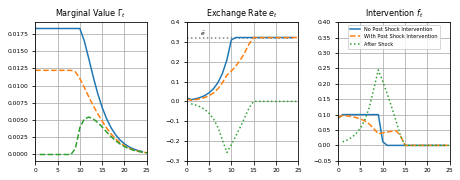

In [28]:
fig = plt.figure(figsize=(width,0.4*width))
sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)

plt.xlim(0,T)

# plt.plot(dfs['E_gamma'], linestyle=linestyles[0])
plt.plot(df0['Gamma'], linestyle=linestyles[0])
plt.plot(tvec*dfs['Gamma'], linestyle=linestyles[1])
plt.plot(tvec*dfs['Gamma_s'], linestyle=linestyles[2])
# plt.plot(dfs['Gamma_s'], linestyle=linestyles[2])

plt.grid()
plt.title("Marginal Value $\Gamma_t$", fontsize=titlesize)
sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
# plt.plot(dfs['E_e'], linestyle=linestyles[1])
vv = df0['e'][T-1]
plt.plot(df0['e']*0+vv, color='grey', linestyle=':')

plt.plot(df0['e'], linestyle=linestyles[0])
plt.plot(dfs['e'], linestyle=linestyles[1])
plt.plot(dfs['e_s'], linestyle=linestyles[2])
plt.text(3,0.33,"$\\bar{e}$",fontsize=leg_fontsize)

# plt.plot(dfs['e_s'], linestyle=linestyles[2])
# for lam in lamvec:
#     df = od[(0.01,lam)]
#     plt.plot(df['target'],linestyle=':', color='grey')
plt.grid()
plt.xlim(0,T)
plt.ylim(-0.3,0.4)

plt.xlim(0,25)
plt.title("Exchange Rate $e_{t}$", fontsize=titlesize)
sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
# plt.plot(dfs['E_f'], label='$E[]$', linestyle=linestyles[1])
plt.plot(df0['f'], label='No Post Shock Intervention', linestyle=linestyles[0])
plt.plot(dfs['f'], label='With Post Shock Intervention', linestyle=linestyles[1])
plt.plot(dfs['f_s'], label='After Shock', linestyle=linestyles[2])

# plt.plot(dfs['f_s'], label='$Stopped$', linestyle=linestyles[2])
plt.grid()
plt.xlim(0,T)

plt.legend(loc='upper center',fontsize=5)
plt.title("Intervention $f_{t}$", fontsize=titlesize)
plt.xlim(0,25)
plt.ylim(-0.05,0.4)
plt.tight_layout()

plt.savefig(output_dir+ "post-shock-intervention.pdf")

In [29]:
df0['e'].max()

0.3225815014151255

In [30]:
# fig = plt.figure(figsize=(width,0.4*width))
# sf = plt.subplot(131)
# sf.tick_params(labelsize=ticksize)

# plt.xlim(0,T)
# plt.plot(dfs['E_gamma'], linestyle=linestyles[0])
# plt.plot(dfs['Gamma'], linestyle=linestyles[1])
# plt.plot(dfs['Gamma_s'], linestyle=linestyles[2])

# plt.grid()
# plt.title("Marginal Value $\Gamma^{\lambda}_t$", fontsize=titlesize)
# sf = plt.subplot(132)
# sf.tick_params(labelsize=ticksize)
# plt.plot(dfs['E_e'], linestyle=linestyles[1])
# plt.plot(dfs['e'], linestyle=linestyles[1])
# plt.plot(dfs['e_s'], linestyle=linestyles[2])
# # for lam in lamvec:
# #     df = od[(0.01,lam)]
# #     plt.plot(df['target'],linestyle=':', color='grey')
# plt.grid()
# plt.xlim(0,T)

# plt.xlim(0,25)
# plt.title("Exchange Rate $e^{\lambda}_{t}$", fontsize=titlesize)
# sf = plt.subplot(133)
# sf.tick_params(labelsize=ticksize)
# plt.plot(dfs['E_f'], label='$E[]$', linestyle=linestyles[1])
# plt.plot(dfs['f'], label='$Continuing$', linestyle=linestyles[1])
# plt.plot(dfs['f_s'], label='$Stopped$', linestyle=linestyles[2])
# plt.grid()
# plt.xlim(0,T)

# plt.legend(loc='upper right',fontsize=leg_fontsize)
# plt.title("Intervention $f^{\lambda}_{t}$", fontsize=titlesize)
# plt.xlim(0,25)
# plt.tight_layout()

# fig.savefig(output_dir + 'figure_stoch.pdf', bbox_inches='tight')

# Accumulation

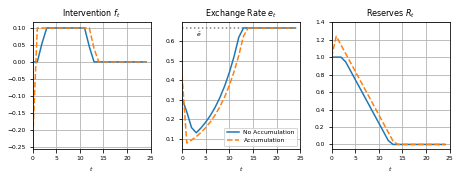

In [31]:
sols = [
    results[("baseline",'optimal',1.0)],
#     results[("accumulation",'optimal',0.5)],
    results[("accumulation",'optimal',1.0)],
#     results[("accumulation",'optimal',2.0)]
]

# sols = [
#     results[("baseline",'optimal',2.0)],
#     results[("accumulation",'optimal',2.0)],
# ]

# betas = [list_of_calibrations[c]['beta'] for c in cases]
labels = [
    'No Accumulation', 'Accumulation'
]

fig = plt.figure(figsize=(width,0.4*width))
#a

vv = sols[0]['e'][T-1]
sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['f'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.grid()
plt.title("Intervention $f_t$", fontsize=titlesize)

sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[0]['e'][:T]*0+vv, color='grey', label='_', linestyle=':')
for i in range(len(sols)):
    plt.plot(sols[i]['e'][:T], label=labels[i], linestyle=linestyles[i])
plt.xlim(0,T)
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)
plt.text(3,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

plt.legend(loc='lower right', fontsize=leg_fontsize)
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e_t$", fontsize=titlesize)

sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['R'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.ylim(min_r, max_r)
plt.ylim(min_r, 1.4)

plt.title("Reserves $R_t$", fontsize=titlesize)


plt.tight_layout()
fig.savefig(output_dir + 'figure_acc.pdf', bbox_inches='tight')

## Option cost (non stochastic)

In [33]:
import pickle
with open("precomputed_option_value.pickle","rb") as f:
    d = pickle.load(f)
dfs = d['commitment']
RVec = [df['R'][0] for df in dfs]

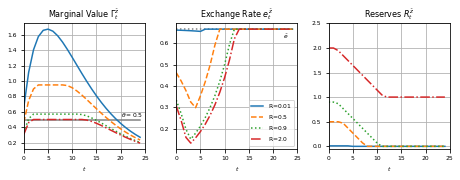

In [34]:
sols = dfs[:3] + [dfs[4]]

# betas = [list_of_calibrations[c]['beta'] for c in cases]
labels = [
    'R=$0.01$',
    'R=$0.5$',
    'R=$0.9$',
    'R=$2.0$',
#     'R=$3.0$'
]



fig = plt.figure(figsize=(width,0.4*width))
#a


sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[i]['Gamma'][:T]*0+0.5, color='grey')
plt.text(20,0.53,"$\\theta=0.5$", fontsize=leg_fontsize)
for i in range(len(sols)):
    plt.plot(sols[i]['Gamma'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.grid()
plt.title("Marginal Value $\Gamma^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[0]['e'][:T]*0+vv, color='grey', label='_', linestyle=':')
for i in range(len(sols)):
    plt.plot(sols[i]['e'][:T], label=labels[i], linestyle=linestyles[i])
plt.xlim(0,T)
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)

plt.legend(loc='lower right', fontsize=leg_fontsize)
plt.grid()
plt.text(22,0.62,"$\\bar{e}$",fontsize=leg_fontsize)

plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['R'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.ylim(min_r, max_r)
plt.ylim(min_r, 2.5)

plt.title("Reserves $R^{\\bar{z}}_t$", fontsize=titlesize)


plt.tight_layout()
fig.savefig(output_dir + 'figure_alpha_commitment_R.pdf', bbox_inches='tight')

## option value (stochastic)

In [47]:
pwd

'/home/pablo/Mobilhome/published/managing_capital_outflows_with_limited_reserves'

In [48]:
import pickle
with open("precomputed_alpha_p.pickle","rb") as f:
    d = pickle.load(f)

In [49]:
pvec = [*d['dfs'].keys()]
dfs = [*d['dfs'].values()]
pvec.reverse()
dfs.reverse()

In [50]:
linestyles = ['solid', 'dashed', 'dotted', 'dashdot', 'dashed']

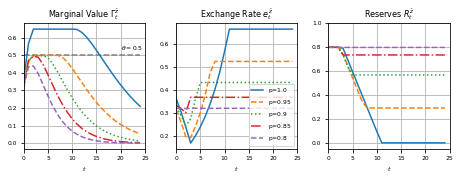

In [51]:
sols = dfs

# sols = [
#     results[("baseline",'optimal',2.0)],
#     results[("accumulation",'optimal',2.0)],
# ]

# betas = [list_of_calibrations[c]['beta'] for c in cases]
labels = ['p=${}$'.format(x) for x in pvec]



fig = plt.figure(figsize=(width,0.4*width))
#a


sf = plt.subplot(131)
sf.tick_params(labelsize=ticksize)
plt.plot(sols[0]['Gamma'][:T]*0+0.5, color='grey', label='_', linestyle='--')
plt.text(20,0.53,"$\\theta=0.5$", fontsize=leg_fontsize)
for i in range(len(sols)):
    plt.plot(sols[i]['Gamma'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.grid()
plt.title("Marginal Value $\Gamma^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(132)
sf.tick_params(labelsize=ticksize)
# plt.plot(sols[0]['e'][:T]*0+vv, color='grey', label='_', linestyle='--')
for i in range(len(sols)):
    plt.plot(sols[i]['e'][:T], label=labels[i], linestyle=linestyles[i])
plt.xlim(0,T)
#plt.text( 1, vv*0.92, '$\overline{e}$', fontsize=ebarsize)

plt.legend(loc='lower right', fontsize=leg_fontsize)
plt.grid()
# plt.text(2,0.63,"$\\bar{e}$",fontsize=leg_fontsize)

plt.xlabel('$t$',fontsize=labelsize)
plt.title("Exchange Rate $e^{\\bar{z}}_t$", fontsize=titlesize)

sf = plt.subplot(133)
sf.tick_params(labelsize=ticksize)
for i in range(len(sols)):
    plt.plot(sols[i]['R'][:T], linestyle=linestyles[i])
yl = plt.ylim()
plt.grid()
plt.xlabel('$t$',fontsize=labelsize)
plt.xlim(0,T)
plt.ylim(min_r, max_r)
plt.ylim(min_r, 1.0)

plt.title("Reserves $R^{\\bar{z}}_t$", fontsize=titlesize)


plt.tight_layout()
fig.savefig(output_dir + 'figure_alpha_commitment_p.pdf', bbox_inches='tight')